In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML # animation in jupyter

import sys
sys.path.append('../src')
from Model import MindReader
from InspectWeights import InspectWeights
from AnimatedScatter import AnimatedScatter

# Create dummy-data

In [3]:
def generate_data():
    size = (128,2)
    N = size[0]
    first_kvadrant = np.random.normal(loc=(1,1), scale=.1, size=size)
    second_kvadrant = np.random.normal(loc=(-1,1), scale=.1, size=size)
    third_kvadrant = np.random.normal(loc=(-1,-1), scale=.1, size=size)
    fourth_kvadrant = np.random.normal(loc=(1,-1), scale=.1, size=size)
    data = np.concatenate([first_kvadrant,second_kvadrant,third_kvadrant,fourth_kvadrant])
    
    labels=np.concatenate([np.zeros(N),np.ones(N),np.ones(N)*2,np.ones(N)*3])
    return data,labels

In [4]:
data,labels = generate_data()

<IPython.core.display.Javascript object>


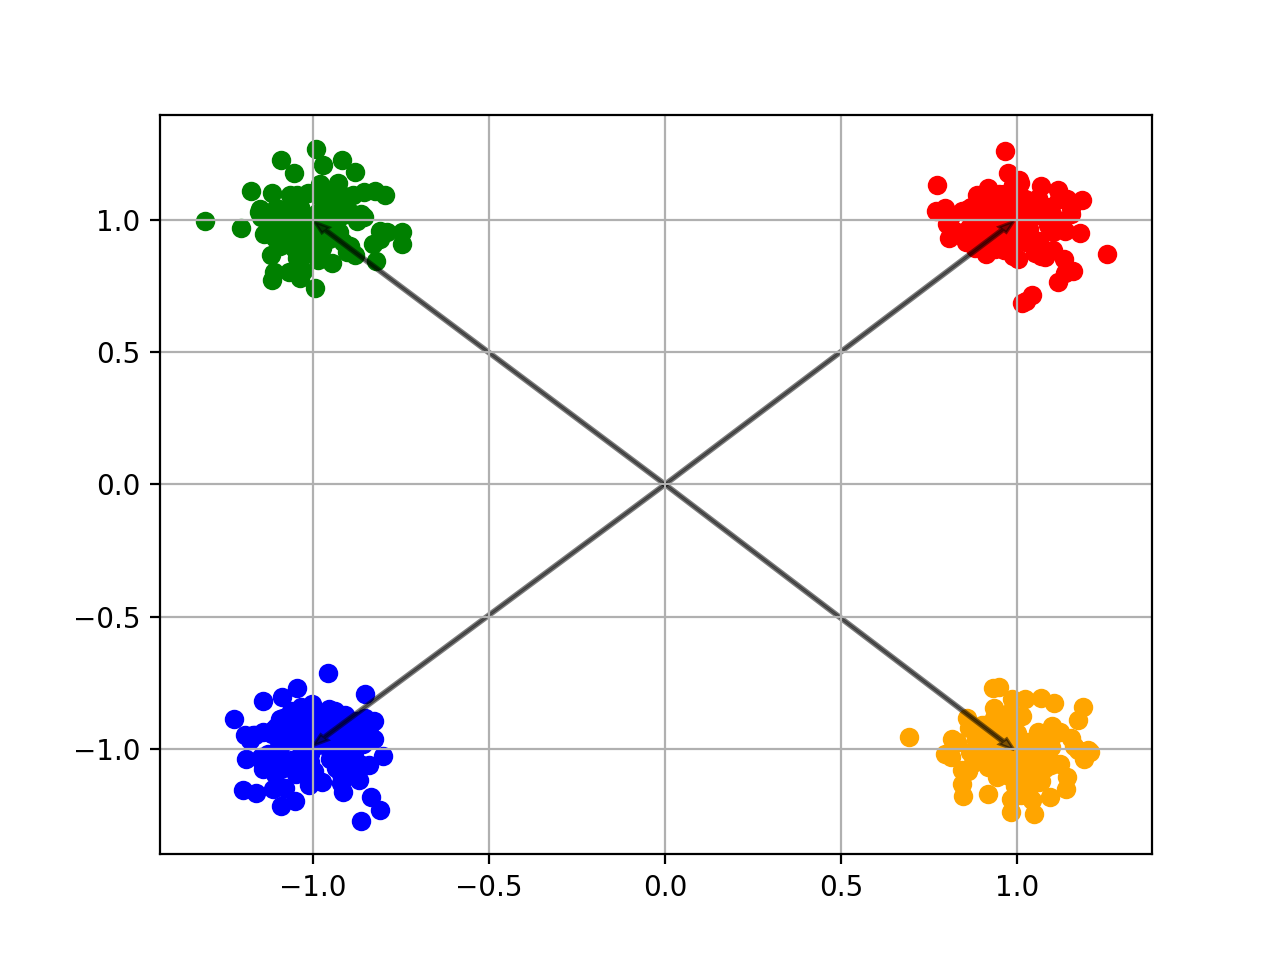

In [5]:
plt.close()
fig, ax = plt.subplots(1)#, sharex='col', sharey='row', gridspec_kw={'wspace': 0})

colors = ['red','green','blue','orange']
means = np.mean(np.reshape(data,(4,int(data.shape[0]/4),data.shape[-1])),axis=1)
cluster_N = int(data.shape[0] / 4)
for color,mean,i in zip(colors,means,range(len(colors))):
    ax.scatter(data[i*cluster_N:(i+1)*cluster_N,0],data[i*cluster_N:(i+1)*cluster_N,1],color=color)
    ax.arrow(0,0,mean[0],mean[1],length_includes_head=True,width=0.01,color=(0,0,0,0.5))
ax.grid('on')

# Initialise DL-model

In [6]:
num_categories = 4 # four data clusters
model = MindReader(num_categories)

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(),  # Optimizer
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Loss func
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()], # Metrics to monitor
)

# Build (by specifying input_shape) and summarize model
mb_size = 32
input_shape = [mb_size,data.shape[-1]]
model.build(input_shape)
model.summary()

Model: "mind_reader"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  8         
_________________________________________________________________
softmax (Softmax)            multiple                  0         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


# Train model and store weight history

In [7]:
IW = InspectWeights()
model.fit(x=data,y=labels,batch_size=32,epochs=100,validation_split=0.1,shuffle=True,callbacks=[IW])

Epoch 1/100
15/15 [==============================] - 1s 40ms/step - loss: 1.9292 - sparse_categorical_accuracy: 0.4394 - val_loss: 0.3484 - val_sparse_categorical_accuracy: 1.0000
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 1.8725 - sparse_categorical_accuracy: 0.4456 - val_loss: 0.3391 - val_sparse_categorical_accuracy: 1.0000
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 1.8310 - sparse_categorical_accuracy: 0.4478 - val_loss: 0.3305 - val_sparse_categorical_accuracy: 1.0000
Epoch 4/100
15/15 [==============================] - 0s 3ms/step - loss: 1.8261 - sparse_categorical_accuracy: 0.4414 - val_loss: 0.3216 - val_sparse_categorical_accuracy: 1.0000
Epoch 5/100
15/15 [==============================] - 0s 3ms/step - loss: 1.8367 - sparse_categorical_accuracy: 0.4232 - val_loss: 0.3137 - val_sparse_categorical_accuracy: 1.0000
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 1.7751 - sparse_categorical_acc

15/15 [==============================] - 0s 2ms/step - loss: 0.8577 - sparse_categorical_accuracy: 0.6612 - val_loss: 0.1363 - val_sparse_categorical_accuracy: 1.0000
Epoch 47/100
15/15 [==============================] - 0s 2ms/step - loss: 0.8054 - sparse_categorical_accuracy: 0.7232 - val_loss: 0.1342 - val_sparse_categorical_accuracy: 1.0000
Epoch 48/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7891 - sparse_categorical_accuracy: 0.7802 - val_loss: 0.1322 - val_sparse_categorical_accuracy: 1.0000
Epoch 49/100
15/15 [==============================] - 0s 3ms/step - loss: 0.7477 - sparse_categorical_accuracy: 0.8342 - val_loss: 0.1304 - val_sparse_categorical_accuracy: 1.0000
Epoch 50/100
15/15 [==============================] - 0s 3ms/step - loss: 0.7421 - sparse_categorical_accuracy: 0.8515 - val_loss: 0.1286 - val_sparse_categorical_accuracy: 1.0000
Epoch 51/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7587 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 2ms/step - loss: 0.2987 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0757 - val_sparse_categorical_accuracy: 1.0000
Epoch 92/100
15/15 [==============================] - 0s 3ms/step - loss: 0.2819 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0749 - val_sparse_categorical_accuracy: 1.0000
Epoch 93/100
15/15 [==============================] - 0s 3ms/step - loss: 0.2761 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0739 - val_sparse_categorical_accuracy: 1.0000
Epoch 94/100
15/15 [==============================] - 0s 2ms/step - loss: 0.2783 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0730 - val_sparse_categorical_accuracy: 1.0000
Epoch 95/100
15/15 [==============================] - 0s 3ms/step - loss: 0.2748 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0720 - val_sparse_categorical_accuracy: 1.0000
Epoch 96/100
15/15 [==============================] - 0s 3ms/step - loss: 0.2645 - sparse_categorical_accuracy: 1

# Animate weight history as memory vectors

In [8]:
IW.weight_history[-1][0].shape
wh_arr = np.array(IW.weight_history)[:,0]
wh_arr.shape

(101, 2, 4)

In [22]:
plt.ioff() # dont auto show plot/gif - jupyter thang
animated_scatter = AnimatedScatter(data,wh_arr)
HTML(animated_scatter.animation.to_html5_video())

# Save animation to file

In [20]:
# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

animation_name = 'my-gif-name-here'
animated_scatter.animation.save('../animations/'+animation_name+'.mp4', writer=writer)